# INFLUENZA -EDA

### by Niranchana Ramakrishnan

## Reading the dataset and cleaning it

In [ ]:
import pandas as pd
df = pd.read_csv("D:/VIW_FNT.csv") #Importing FluNet Dataset
# The dataframe is checked to see if there are any null values.
df.info()
# Checking for null values in dataframe
df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138522 entries, 0 to 138521
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   WHOREGION                138522 non-null  object 
 1   FLUSEASON                138522 non-null  object 
 2   HEMISPHERE               138522 non-null  object 
 3   ITZ                      138522 non-null  object 
 4   COUNTRY_CODE             138522 non-null  object 
 5   COUNTRY_AREA_TERRITORY   138522 non-null  object 
 6   ISO_WEEKSTARTDATE        138522 non-null  object 
 7   ISO_YEAR                 138522 non-null  int64  
 8   ISO_WEEK                 138522 non-null  int64  
 9   MMWR_WEEKSTARTDATE       138522 non-null  object 
 10  MMWR_YEAR                138522 non-null  int64  
 11  MMWR_WEEK                138522 non-null  int64  
 12  ORIGIN_SOURCE            138522 non-null  object 
 13  SPEC_PROCESSED_NB        130993 non-null  float64
 14  SPEC

2816973

In [ ]:
df1 = pd.read_csv("D:/VIW_FID_EPI.csv",low_memory=False) #Low-memory=False was given as a suggestion in warning to counter for a possible mixed datatype in columns 31-36
# Importing FluID dataset
df1.info()
# Checking for null values in dataframe
df1.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401640 entries, 0 to 401639
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   WHOREGION               401640 non-null  object 
 1   FLUSEASON               401400 non-null  object 
 2   HEMISPHERE              401400 non-null  object 
 3   ITZ                     401480 non-null  object 
 4   COUNTRY_CODE            401640 non-null  object 
 5   COUNTRY_AREA_TERRITORY  401640 non-null  object 
 6   ISO_WEEKSTARTDATE       401640 non-null  object 
 7   ISO_YEAR                401640 non-null  int64  
 8   ISO_WEEK                401640 non-null  int64  
 9   MMWR_WEEKSTARTDATE      401640 non-null  object 
 10  MMWR_YEAR               401640 non-null  int64  
 11  MMWR_WEEK               401640 non-null  int64  
 12  ORIGIN_SOURCE           401640 non-null  object 
 13  AGEGROUP_CODE           401111 non-null  object 
 14  ILI_CASES           

7952407

In [ ]:
# creating a dataframe that includes the various virus types
df_vi=df.iloc[:,15:32]
# filling null values with 0 to allow addition
# The total values of influenza A,B and combined along with notsubtyped A are combined
df_vi.fillna(value=0,inplace=True)
df_vi['A_OTHER']=df_vi['ANOTSUBTYPED'] +df_vi['ANOTSUBTYPABLE'] +df_vi['AOTHER_SUBTYPE']
df_vi['INF_A']= df_vi['AH1N12009']+df_vi['AH1']+df_vi['AH3']+df_vi['AH5']+df_vi['AH7N9'] +df_vi['A_OTHER']
df_vi['INF_B']= df_vi['BVIC_2DEL']+ df_vi['BVIC_3DEL']+ df_vi['BVIC_NODEL']+df_vi['BVIC_DELUNK'] +df_vi['BYAM'] +df_vi['BNOTDETERMINED']
df_vi['INF_ALL']=df_vi['INF_A']+df_vi['INF_B']
# Adding the updated values columns from virus dataset to the original dataset df
df['INF_A']=df_vi['INF_A']
df['INF_B']=df_vi['INF_B']
df['INF_ALL']=df_vi['INF_ALL']
df['A_OTHER']=df_vi['A_OTHER']

In [ ]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate_rows = df[df.duplicated()]

print("Duplicate Rows :")
duplicate_rows

Duplicate Rows :


,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,MMWR_WEEKSTARTDATE,...,RHINO,RSV,OTHERRESPVIRUS,OTHER_RESPVIRUS_DETAILS,LAB_RESULT_COMMENT,WCR_COMMENT,ISO2,ISOYW,MMWRYW,A_OTHER


In [ ]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate_rows_1 = df1[df1.duplicated()]

print("Duplicate Rows :")
duplicate_rows_1

Duplicate Rows :


,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,MMWR_WEEKSTARTDATE,...,TREND,GEOSPREAD_COMMENTS,ILI_NB_SITES,SARI_NB_SITES,ARI_NB_SITES,PNEU_NB_SITES,COMMENTS,ISO2,ISOYW,MMWRYW


In [ ]:
# Removing unwanted columns
df.drop(columns =['FLUSEASON','HEMISPHERE','ITZ','COUNTRY_CODE','MMWR_WEEKSTARTDATE','MMWR_YEAR','MMWR_WEEK','MMWRYW','ISO2','WCR_COMMENT','LAB_RESULT_COMMENT','OTHER_RESPVIRUS_DETAILS','SPEC_RECEIVED_NB','ISOYW','AOTHER_SUBTYPE_DETAILS','ANOTSUBTYPED','ANOTSUBTYPABLE','AOTHER_SUBTYPE','INF_NEGATIVE'],axis=1,inplace=True)
df.head()

,WHOREGION,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,ORIGIN_SOURCE,SPEC_PROCESSED_NB,AH1N12009,AH1,AH3,...,ILI_ACTIVITY,ADENO,BOCA,HUMAN_CORONA,METAPNEUMO,PARAINFLUENZA,RHINO,RSV,OTHERRESPVIRUS,A_OTHER
0,AMR,Aruba,2017-01-09,2017,2,NOTDEFINED,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0
1,AMR,Aruba,2017-02-13,2017,7,NOTDEFINED,5.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,AMR,Aruba,2017-03-20,2017,12,NOTDEFINED,7.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,AMR,Aruba,2017-04-24,2017,17,NOTDEFINED,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0
4,AMR,Aruba,2017-05-29,2017,22,NOTDEFINED,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
# Removing unwanted columns
df1=df1[['WHOREGION','COUNTRY_AREA_TERRITORY','ISO_WEEKSTARTDATE','ISO_YEAR','ISO_WEEK','ORIGIN_SOURCE','AGEGROUP_CODE','ILI_CASES','ILI_OUTPATIENTS','SARI_CASES',
'SARI_DEATHS','ARI_CASES','ARI_OUTPATIENTS']]
df1.head()

,WHOREGION,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,ORIGIN_SOURCE,AGEGROUP_CODE,ILI_CASES,ILI_OUTPATIENTS,SARI_CASES,SARI_DEATHS,ARI_CASES,ARI_OUTPATIENTS
0,AFR,South Sudan,2019-03-25,2019,13,NOTDEFINED,15TO49,0.0,0.0,0.0,NaN,NaN,NaN
1,AFR,South Sudan,2019-04-08,2019,15,NOTDEFINED,5TO14,1.0,4.0,2.0,NaN,NaN,NaN
2,AFR,South Sudan,2019-04-08,2019,15,NOTDEFINED,All,1240.0,3730.0,170.0,NaN,NaN,NaN
3,AFR,South Sudan,2019-04-29,2019,18,NOTDEFINED,15TO49,1.0,1090.0,1.0,NaN,NaN,NaN
4,AFR,South Sudan,2019-04-29,2019,18,NOTDEFINED,50TO64,7.0,30.0,2.0,NaN,NaN,NaN


In [ ]:
# Renaming columns
df = df.rename(columns = {'WHOREGION':'WHO_REGION',
                          'COUNTRY_AREA_TERRITORY':'COUNTRY',
                          'ISO_WEEKSTARTDATE':'START_DATE',
                           'ISO_YEAR':'YEAR',
                           'ISO_WEEK':'WEEK',
                           'SPEC_PROCESSED_NB':'TOTAL_SPECIMENS',
                           'BNOTDETERMINED':'B_OTHER'})
# Converting year to string
df['YEAR'] = df['YEAR'].astype('str')
df.head()

,WHO_REGION,COUNTRY,START_DATE,YEAR,WEEK,ORIGIN_SOURCE,TOTAL_SPECIMENS,AH1N12009,AH1,AH3,...,ILI_ACTIVITY,ADENO,BOCA,HUMAN_CORONA,METAPNEUMO,PARAINFLUENZA,RHINO,RSV,OTHERRESPVIRUS,A_OTHER
0,AMR,Aruba,2017-01-09,2017,2,NOTDEFINED,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0
1,AMR,Aruba,2017-02-13,2017,7,NOTDEFINED,5.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,AMR,Aruba,2017-03-20,2017,12,NOTDEFINED,7.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,AMR,Aruba,2017-04-24,2017,17,NOTDEFINED,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0
4,AMR,Aruba,2017-05-29,2017,22,NOTDEFINED,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
# Renaming columns
df1 = df1.rename(columns = {'WHOREGION':'WHO_REGION',
                          'COUNTRY_AREA_TERRITORY':'COUNTRY',
                          'ISO_WEEKSTARTDATE':'START_DATE',
                           'ISO_YEAR':'YEAR',
                           'ISO_WEEK':'WEEK'})
# Converting year to string
df1['YEAR'] = df1['YEAR'].astype('str')
df1.head()

,WHO_REGION,COUNTRY,START_DATE,YEAR,WEEK,ORIGIN_SOURCE,AGEGROUP_CODE,ILI_CASES,ILI_OUTPATIENTS,SARI_CASES,SARI_DEATHS,ARI_CASES,ARI_OUTPATIENTS
0,AFR,South Sudan,2019-03-25,2019,13,NOTDEFINED,15TO49,0.0,0.0,0.0,NaN,NaN,NaN
1,AFR,South Sudan,2019-04-08,2019,15,NOTDEFINED,5TO14,1.0,4.0,2.0,NaN,NaN,NaN
2,AFR,South Sudan,2019-04-08,2019,15,NOTDEFINED,All,1240.0,3730.0,170.0,NaN,NaN,NaN
3,AFR,South Sudan,2019-04-29,2019,18,NOTDEFINED,15TO49,1.0,1090.0,1.0,NaN,NaN,NaN
4,AFR,South Sudan,2019-04-29,2019,18,NOTDEFINED,50TO64,7.0,30.0,2.0,NaN,NaN,NaN


In [ ]:
#Coverting datframe from wide to long
df_resp_val=df.iloc[:,7:31]
df_resp_col_val=df_resp_val.columns.values
col = df_resp_col_val
df_new = (pd.melt(df, id_vars = ['WHO_REGION','COUNTRY','START_DATE','YEAR','WEEK','TOTAL_SPECIMENS','ORIGIN_SOURCE'], value_vars = col, var_name = 'RESPIRATORY_VIRUS', value_name = 'POSITIVE_COUNT'))
df_new.info()
df_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3324528 entries, 0 to 3324527
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   WHO_REGION         object 
 1   COUNTRY            object 
 2   START_DATE         object 
 3   YEAR               object 
 4   WEEK               int64  
 5   TOTAL_SPECIMENS    float64
 6   ORIGIN_SOURCE      object 
 7   RESPIRATORY_VIRUS  object 
 8   POSITIVE_COUNT     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 228.3+ MB


,WHO_REGION,COUNTRY,START_DATE,YEAR,WEEK,TOTAL_SPECIMENS,ORIGIN_SOURCE,RESPIRATORY_VIRUS,POSITIVE_COUNT
0,AMR,Aruba,2017-01-09,2017,2,2.0,NOTDEFINED,AH1N12009,NaN
1,AMR,Aruba,2017-02-13,2017,7,5.0,NOTDEFINED,AH1N12009,1.0
2,AMR,Aruba,2017-03-20,2017,12,7.0,NOTDEFINED,AH1N12009,3.0
3,AMR,Aruba,2017-04-24,2017,17,1.0,NOTDEFINED,AH1N12009,NaN
4,AMR,Aruba,2017-05-29,2017,22,1.0,NOTDEFINED,AH1N12009,NaN


In [ ]:
# Removing nan values
df_new.dropna(inplace=True)
df_new.head()

,WHO_REGION,COUNTRY,START_DATE,YEAR,WEEK,TOTAL_SPECIMENS,ORIGIN_SOURCE,RESPIRATORY_VIRUS,POSITIVE_COUNT
1,AMR,Aruba,2017-02-13,2017,7,5.0,NOTDEFINED,AH1N12009,1.0
2,AMR,Aruba,2017-03-20,2017,12,7.0,NOTDEFINED,AH1N12009,3.0
6,AMR,Aruba,2018-01-01,2018,1,5.0,NOTDEFINED,AH1N12009,1.0
8,AMR,Aruba,2018-03-12,2018,11,2.0,NOTDEFINED,AH1N12009,2.0
10,AMR,Aruba,2018-11-12,2018,46,4.0,NOTDEFINED,AH1N12009,1.0


In [ ]:
# Here null values have been handled with using 0 because removing null value rows results in eliminating extremely high number of countries and years
df1_new=df1.fillna(value=0)
df1_new.head()

,WHO_REGION,COUNTRY,START_DATE,YEAR,WEEK,ORIGIN_SOURCE,AGEGROUP_CODE,ILI_CASES,ILI_OUTPATIENTS,SARI_CASES,SARI_DEATHS,ARI_CASES,ARI_OUTPATIENTS
0,AFR,South Sudan,2019-03-25,2019,13,NOTDEFINED,15TO49,0.0,0.0,0.0,0.0,0.0,0.0
1,AFR,South Sudan,2019-04-08,2019,15,NOTDEFINED,5TO14,1.0,4.0,2.0,0.0,0.0,0.0
2,AFR,South Sudan,2019-04-08,2019,15,NOTDEFINED,All,1240.0,3730.0,170.0,0.0,0.0,0.0
3,AFR,South Sudan,2019-04-29,2019,18,NOTDEFINED,15TO49,1.0,1090.0,1.0,0.0,0.0,0.0
4,AFR,South Sudan,2019-04-29,2019,18,NOTDEFINED,50TO64,7.0,30.0,2.0,0.0,0.0,0.0


In [ ]:
df_new['YEAR'].value_counts()

2022    132313
2021    124700
2019    114067
2018    113287
2017    108281
2020    107917
2016    102727
2015     96708
2014     89114
2013     80296
2012     68456
2011     66840
2010     57934
2009     41957
2008     24730
2007     18964
2006     15192
2005     12348
2004     12196
2003     11886
2002      9732
2001      7139
2000      6536
2023      5550
1999      5217
1998      3330
1997      2936
1996       843
1995       216
Name: YEAR, dtype: int64

In [ ]:
df1_new['YEAR'].value_counts()

2020    42651
2019    37973
2018    37618
2022    36801
2021    35747
2017    34867
2016    32700
2015    29713
2014    23869
2013    23778
2012    23471
2011    18142
2010    13068
2009     6478
2023     1617
2008     1014
2007      624
2006      379
2005      262
2004      260
2003      240
2002      155
2001       78
1998       36
1999       29
2000       29
1997       28
1996       13
Name: YEAR, dtype: int64

It is evident that the data count corresponding to each year differs between the two dataframes.
Due to some challenges which will be explained more in detail in the final section of the project,the two dataframes are used individually.

In [ ]:
# The cleaned datatsets are written onto csv file
df_new.to_csv("Cleaned_FLUNET.csv")
df1_new.to_csv("Cleaned_FLUID.csv")




## Data dictionary

> The data dictionaries for the final datasets

> FLUNET:

> | Column | Dtype | Definition |
 | --- | --- | --- |
 | WHO_REGION | object |  WHO region covered |
 | COUNTRY    | objecT | Country Name |
 | START_DATE | object | Start date of specimen testing |
 | YEAR | object | Year of testing |
 | WEEK | int64 | Week of testing |
 | TOTAL_SPECIMENS | float64 | Total specimens processes |
 | ORIGIN_SOURCE | object | Origin of surveillance results-sentinental/non-sentinel |
 | RESPIRATORY_VIRUS| object| virus type |
 | POSITIVE_COUNT | float64 | Count of reported positives |


> FLUID :


> | Column | Dtype | Definition |
 | --- | --- | --- |
 | WHO_REGION | object | WHO region covered|
 | COUNTRY    | object | Country Name |
 | START_DATE | object | Start date of specimen testing |
 | YEAR | object | Year of testing |
 | WEEK | int64 | Week of testing |
 | ORIGIN_SOURCE | object | Origin of surveillance results-sentinental/non-sentinel |
 | AGEGROUP_CODE | object | Age classification as provided by the reporting country |
 | ILI_CASES     | float64 | Number of reported ILI cases |
 | ILI_OUTPATIENTS | float64 | Number of ILI outpatient visits |
 | SARI_CASES |  float64 | Number of reported SARI cases |
 | SARI_DEATHS | float64 | Number of reported SARI deaths |
 | ARI_CASES | float64 | Number of reported ARI cases |
 | ARI_OUTPATIENTS | float64 | Number of reported ARI cases |

# 3. RESULTS

In [ ]:
df_new.to_csv("Cleaned_FLUNET.csv")

In [ ]:
df1_new.to_csv("Cleaned_FLUID.csv")

In [ ]:
Flunet_new = pd.read_csv("Cleaned_FLUNET.csv")
Flunet_new.info()
Flunet_new.drop(['Unnamed: 0'], axis=1,inplace=True)
Flunet_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441412 entries, 0 to 1441411
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1441412 non-null  int64  
 1   WHO_REGION         1441412 non-null  object 
 2   COUNTRY            1441412 non-null  object 
 3   START_DATE         1441412 non-null  object 
 4   YEAR               1441412 non-null  int64  
 5   WEEK               1441412 non-null  int64  
 6   TOTAL_SPECIMENS    1441412 non-null  float64
 7   ORIGIN_SOURCE      1441412 non-null  object 
 8   RESPIRATORY_VIRUS  1441412 non-null  object 
 9   POSITIVE_COUNT     1441412 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 110.0+ MB


,WHO_REGION,COUNTRY,START_DATE,YEAR,WEEK,TOTAL_SPECIMENS,ORIGIN_SOURCE,RESPIRATORY_VIRUS,POSITIVE_COUNT
0,AMR,Aruba,2017-02-13,2017,7,5.0,NOTDEFINED,AH1N12009,1.0
1,AMR,Aruba,2017-03-20,2017,12,7.0,NOTDEFINED,AH1N12009,3.0
2,AMR,Aruba,2018-01-01,2018,1,5.0,NOTDEFINED,AH1N12009,1.0
3,AMR,Aruba,2018-03-12,2018,11,2.0,NOTDEFINED,AH1N12009,2.0
4,AMR,Aruba,2018-11-12,2018,46,4.0,NOTDEFINED,AH1N12009,1.0


## REGION-WISE ANALYSIS

The region-wise analysis is done to shed light on the following questions

> - Has influenza spread increased over the recent years and are marked changes observed over the decade?
> - Are there particular WHO regions that are strongly affected by influenza and contibute a greater proportion of worldwide cases?

Specific answers to the questions is highlighted in bold after the analysis

In [ ]:
# Changing the codes of the WHO regions to the names of the region for easier understanding
RegMap = {'EUR':'Europe',
           'AMR':'America',
            'AFR':'Africa',
            'WPR':'Western Pacific',
            'EMR':'Eastern Mediterranean',
            'SEAR':'South-East Asia Region'}

In [ ]:
Flunet_new['WHO_REGION'] = Flunet_new['WHO_REGION'].map(RegMap)
total_infl= Flunet_new[Flunet_new['RESPIRATORY_VIRUS']=='INF_ALL']
year_1=[x for x in range(2002,2013)]
year_2 =[x for x in range(2013,2024)]
dfyr1 =total_infl[total_infl['YEAR'].isin(year_1)]
dfyr2=total_infl[total_infl['YEAR'].isin(year_2)]
gkyr1 = dfyr1.groupby(['YEAR','WHO_REGION']).POSITIVE_COUNT.aggregate(Influenza_cases='sum')
gkyr2 = dfyr2.groupby(['YEAR','WHO_REGION']).POSITIVE_COUNT.aggregate(Influenza_cases='sum')

Text(0.5, 1.0, 'Influenza cases count year and region-wise')

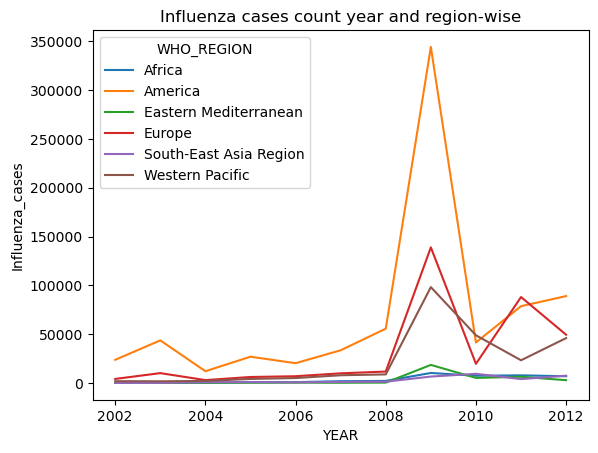

In [ ]:
gkyr1= gkyr1.reset_index()
import seaborn as sns
# plot barplot
sns.lineplot(x="YEAR",
           y="Influenza_cases",
           hue="WHO_REGION",
           data=gkyr1).set_title("Influenza cases count year and region-wise")

The above graph shows the year wise and region-wise distribution of total influenza cases from 2002-2012.The X-axis displays the year and the y-axis display the total influenza cases count. The various regions are distinguished by different colours of the bar plot.

From the above graph it is evident that,America has largest recorded influenza-positive cases every year except 2010 and 2011 where Europe and Western Pacific has more recorded cases than America. 2009 has the highest recorded cases in this decade with America having recorded close to 350000 cases.

In most of the years,Europe has second highest count following America in the total recorded Influenza cases. It would be interesting to explore the virus-type in 2009 to see if what virus caused the sudden huge spike and if there was a new virus recorded that year.


**America is strongly affected by influenza and contribute a greater proportion of worldwide cases.Also compared to the intial years of the decade,the later years have  more recorded cases.**

Text(0.5, 1.0, 'Influenza cases count year and region-wise')

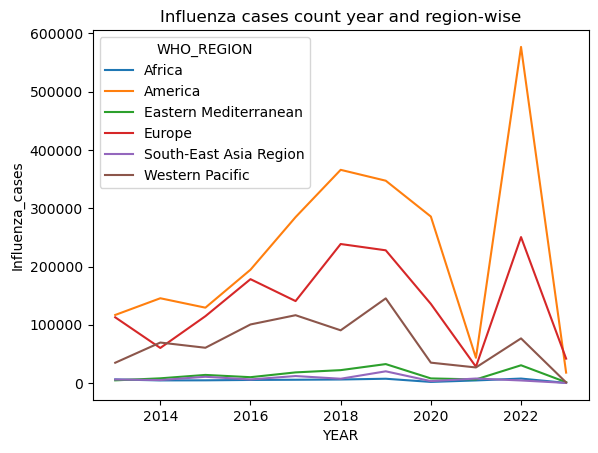

In [ ]:
gkyr2= gkyr2.reset_index()
import seaborn as sns
# plot barplot
sns.lineplot(x="YEAR",
           y="Influenza_cases",
           hue="WHO_REGION",
           data=gkyr2).set_title("Influenza cases count year and region-wise")

The above graph shows the year wise and region-wise distribution of total influenza cases from 2013-2023.The X-axis displays the year and the y-axis display the total influenza cases count. The various regions are distinguished by different colours of the bar plot

It is interesting to note that 2022,(the year after COVID-19 started subsiding) has the highest recorded value of influenza cases with America recording nearly 600000 cases.
Also in America,an increasing trend in the virus has been observed from 2013 to 2018 followed by a decline and a sudden sharp rise in 2022.It would be interesting to explore the virus-type in 2022 to see if what virus caused the sudden huge spike and if there was a new virus recorded that year.Europe once again has the second largest count followed by western-Pacific.

**An interesting observation is that the decade 2013-2023 has higher values of recorded positive influenza cases compared to the previous decade. As expected there is a marked shift in trend over the two decades. America once again has the highest recorded values of influenza cases in this decade from 2013-2022 and contributes to a greater proportion of cases worldwide.This is followed by Europe.**

#### Understanding descriptive statistics measures

In [ ]:
pd.options.display.max_rows = 400

In [ ]:
# Calculating the mean,median ,maximum and minimum values of the weekly positive influenza cases from 2002-2012 region/wise
g1=dfyr1.groupby(['YEAR','WHO_REGION']).agg({'POSITIVE_COUNT':['min',max,'mean','median',sum]})
g1

POSITIVE_COUNT                              \
                                       min      max        mean median   
YEAR WHO_REGION                                                          
2002 Africa                            0.0     18.0    2.191781    1.0   
     America                           0.0   1833.0   60.192893    2.0   
     Eastern Mediterranean             0.0     26.0    3.500000    0.0   
     Europe                            0.0    202.0    9.418764    1.0   
     South-East Asia Region            0.0      6.0    0.574074    0.0   
     Western Pacific                   0.0    178.0    6.775281    0.0   
2003 Africa                            0.0     26.0    1.733813    0.0   
     America                           0.0   4086.0   85.023392    2.0   
     Eastern Mediterranean             0.0     13.0    2.095238    0.0   
     Europe                            0.0    441.0   16.658940    4.0   
     South-East Asia Region            0.0      9.0    0.969697    0.0   
     Western Pacific                   0.0    116.0    6.603113    0.0   
2004 Africa                            0.0     16.0    1.291971    0.0   
     America                           0.0   1686.0   22.108456    1.0   
     Eastern Mediterranean             0.0     29.0    4.550000    2.0   
     Europe                            0.0    134.0    5.203209    0.0   
     South-East Asia Region            0.0     89.0   11.388060    4.0   
     Western Pacific                   0.0    194.0    7.800000    1.0   
2005 Africa                            0.0    105.0    5.521739    0.0   
     America                           0.0   2699.0   52.003868    1.0   
     Eastern Mediterranean             0.0     25.0    4.385965    3.0   
     Europe                            0.0    235.0   10.589255    1.0   
     South-East Asia Region            1.0     45.0   13.378788   11.5   
     Western Pacific                   0.0    217.0   16.440000    1.0   
2006 Africa                            0.0    125.0    4.847953    0.0   
     America                           0.0   1510.0   38.546667    1.0   
     Eastern Mediterranean             0.0     27.0    5.285714    4.0   
     Europe                            0.0    148.0    9.405738    1.0   
     South-East Asia Region            0.0     81.0    8.986111    4.0   
     Western Pacific                   0.0    283.0   13.524194    2.0   
2007 Africa                            0.0    231.0    6.861004    1.0   
     America                           0.0   2532.0   49.574815    1.0   
     Eastern Mediterranean             0.0     21.0    2.546667    1.0   
     Europe                            0.0    245.0   12.345432    0.0   
     South-East Asia Region            0.0     71.0   10.182692    2.0   
     Western Pacific                   0.0    473.0   16.987069    3.0   
2008 Africa                            0.0     85.0    6.288288    1.0   
     America                           0.0   5186.0   74.431058    1.0   
     Eastern Mediterranean             0.0     24.0    2.177515    1.0   
     Europe                            0.0    254.0   12.274448    1.0   
     South-East Asia Region            0.0     71.0    8.722973    2.0   
     Western Pacific                   0.0    286.0   18.986985    8.0   
2009 Africa                            0.0    235.0   22.912556    4.0   
     America                           0.0  12111.0  342.535323    4.0   
     Eastern Mediterranean             0.0    959.0   54.388235    4.0   
     Europe                            0.0   2661.0   88.299428   14.0   
     South-East Asia Region            0.0    905.0   46.397163   14.0   
     Western Pacific                   0.0   5587.0  181.441774   15.0   
2010 Africa                            0.0    203.0    7.259332    1.0   
     America                           0.0   2375.0   35.400512    5.0   
     Eastern Mediterranean             0.0    739.0   13.865591    1.0   
     Europe                     

In [ ]:
# Calculating the mean,median ,maximum and minimum values of the weekly positive influenza cases from 2012-2022 region/wise
dfyr2.groupby(['YEAR','WHO_REGION']).agg({'POSITIVE_COUNT':['min',max,'mean','median',sum]})

POSITIVE_COUNT                              \
                                       min      max        mean median   
YEAR WHO_REGION                                                          
2013 Africa                            0.0    139.0    5.229605    2.0   
     America                           0.0   6897.0   86.686202    5.0   
     Eastern Mediterranean             0.0    269.0    9.414980    3.0   
     Europe                            0.0   3388.0   39.258525    0.0   
     South-East Asia Region            0.0    117.0   16.711538    8.0   
     Western Pacific                   0.0   3399.0   56.028939    5.0   
2014 Africa                            0.0     89.0    4.950820    2.0   
     America                           0.0  13747.0  104.323297    2.0   
     Eastern Mediterranean             0.0    267.0   16.133201    2.0   
     Europe                            0.0    872.0   14.989793    0.0   
     South-East Asia Region            0.0    116.0   14.353760    8.0   
     Western Pacific                   0.0   4091.0  111.587480    5.0   
2015 Africa                            0.0    126.0    5.685230    2.0   
     America                           0.0  11406.0   85.115789    2.0   
     Eastern Mediterranean             0.0    930.0   23.595601    3.0   
     Europe                            0.0   2289.0   27.069592    0.0   
     South-East Asia Region            0.0   1040.0   25.796651    6.5   
     Western Pacific                   0.0   2587.0   86.041193    4.5   
2016 Africa                            0.0     80.0    4.617113    1.0   
     America                           0.0   8697.0  134.142759    5.0   
     Eastern Mediterranean             0.0    321.0   17.643860    3.5   
     Europe                            0.0   4321.0   40.431066    1.0   
     South-East Asia Region            0.0    138.0   13.112051    5.0   
     Western Pacific                   0.0   4367.0  135.721997    7.0   
2017 Africa                            0.0    117.0    4.997354    1.0   
     America                           0.0  14094.0  168.907473    2.0   
     Eastern Mediterranean             0.0    745.0   25.311203    2.0   
     Europe                            0.0   2150.0   31.430965    0.0   
     South-East Asia Region            0.0    433.0   24.403651   10.0   
     Western Pacific                   0.0   5014.0  155.664439   10.0   
2018 Africa                            0.0     99.0    4.746885    2.0   
     America                           0.0  22108.0  216.141170    3.0   
     Eastern Mediterranean             0.0    753.0   29.416999    4.0   
     Europe                            0.0   3254.0   51.437594    0.0   
     South-East Asia Region            0.0    325.0   14.477495    5.0   
     Western Pacific                   0.0   6159.0  124.137174    8.0   
2019 Africa                            0.0    218.0    5.429934    2.0   
     America                           0.0  17244.0  197.427516    4.0   
     Eastern Mediterranean             0.0   1017.0   40.080049    5.0   
     Europe                            0.0   4341.0   50.144618    1.0   
     South-East Asia Region            0.0    871.0   39.563851   12.0   
     Western Pacific                   0.0   6118.0  202.401114   13.0   
2020 Africa                            0.0     38.0    1.951710    0.0   
     America                           0.0  21773.0   92.357789    0.0   
     Eastern Mediterranean             0.0    589.0   11.526087    0.0   
     Europe                            0.0   2559.0   34.837394    0.0   
     South-East Asia Region            0.0    219.0    5.259968    0.0   
     Western Pacific                   0.0   6212.0   47.685286    0.0   
2021 Africa                            0.0     51.0    3.755649    1.0   
     America                           0.0   7318.0   13.885010    0.0   
     Eastern Mediterranean             0.0    596.0    8.103896    0.0   
     Europe                     

From the data,minimum values of 0 ,indicate that there are weeks with no influenza cases reported.It is also found that the median is much smaller than the mean. This indicates a positively skewed distribution.This difference is especially high in regions like America which could indicate a highly positively skewed distribution. This could be attributed to having many weeks in the year with 0 or few very cases and few weeks that have large values.This could indicate the possible seasonal nature of the disease which can be investigated in further plots.

## ANALYSIS BY COUNTRY

As a region-wise analysis has been carried out,it would be better to understand the countries that are causing the highest cases each year.It would be nice to explore if particular countries are responsible for the large values of cases observed in American region and other regions so that further analysis could be concentrated on them.

The analysis may shed light on
> - Are there particular countries that are strongly affected by influenza and contibute a greater proportion of overall cases in the continent/WHO region?
> -	Are there particular countries that are strongly affected by influenza and contribute a greater proportion of overall cases in American region?
> - Has there been a change in the countries most affected by influenza in the recent years?
> - Is a particular country responsible for sudden high cases in 2009 and 2022?

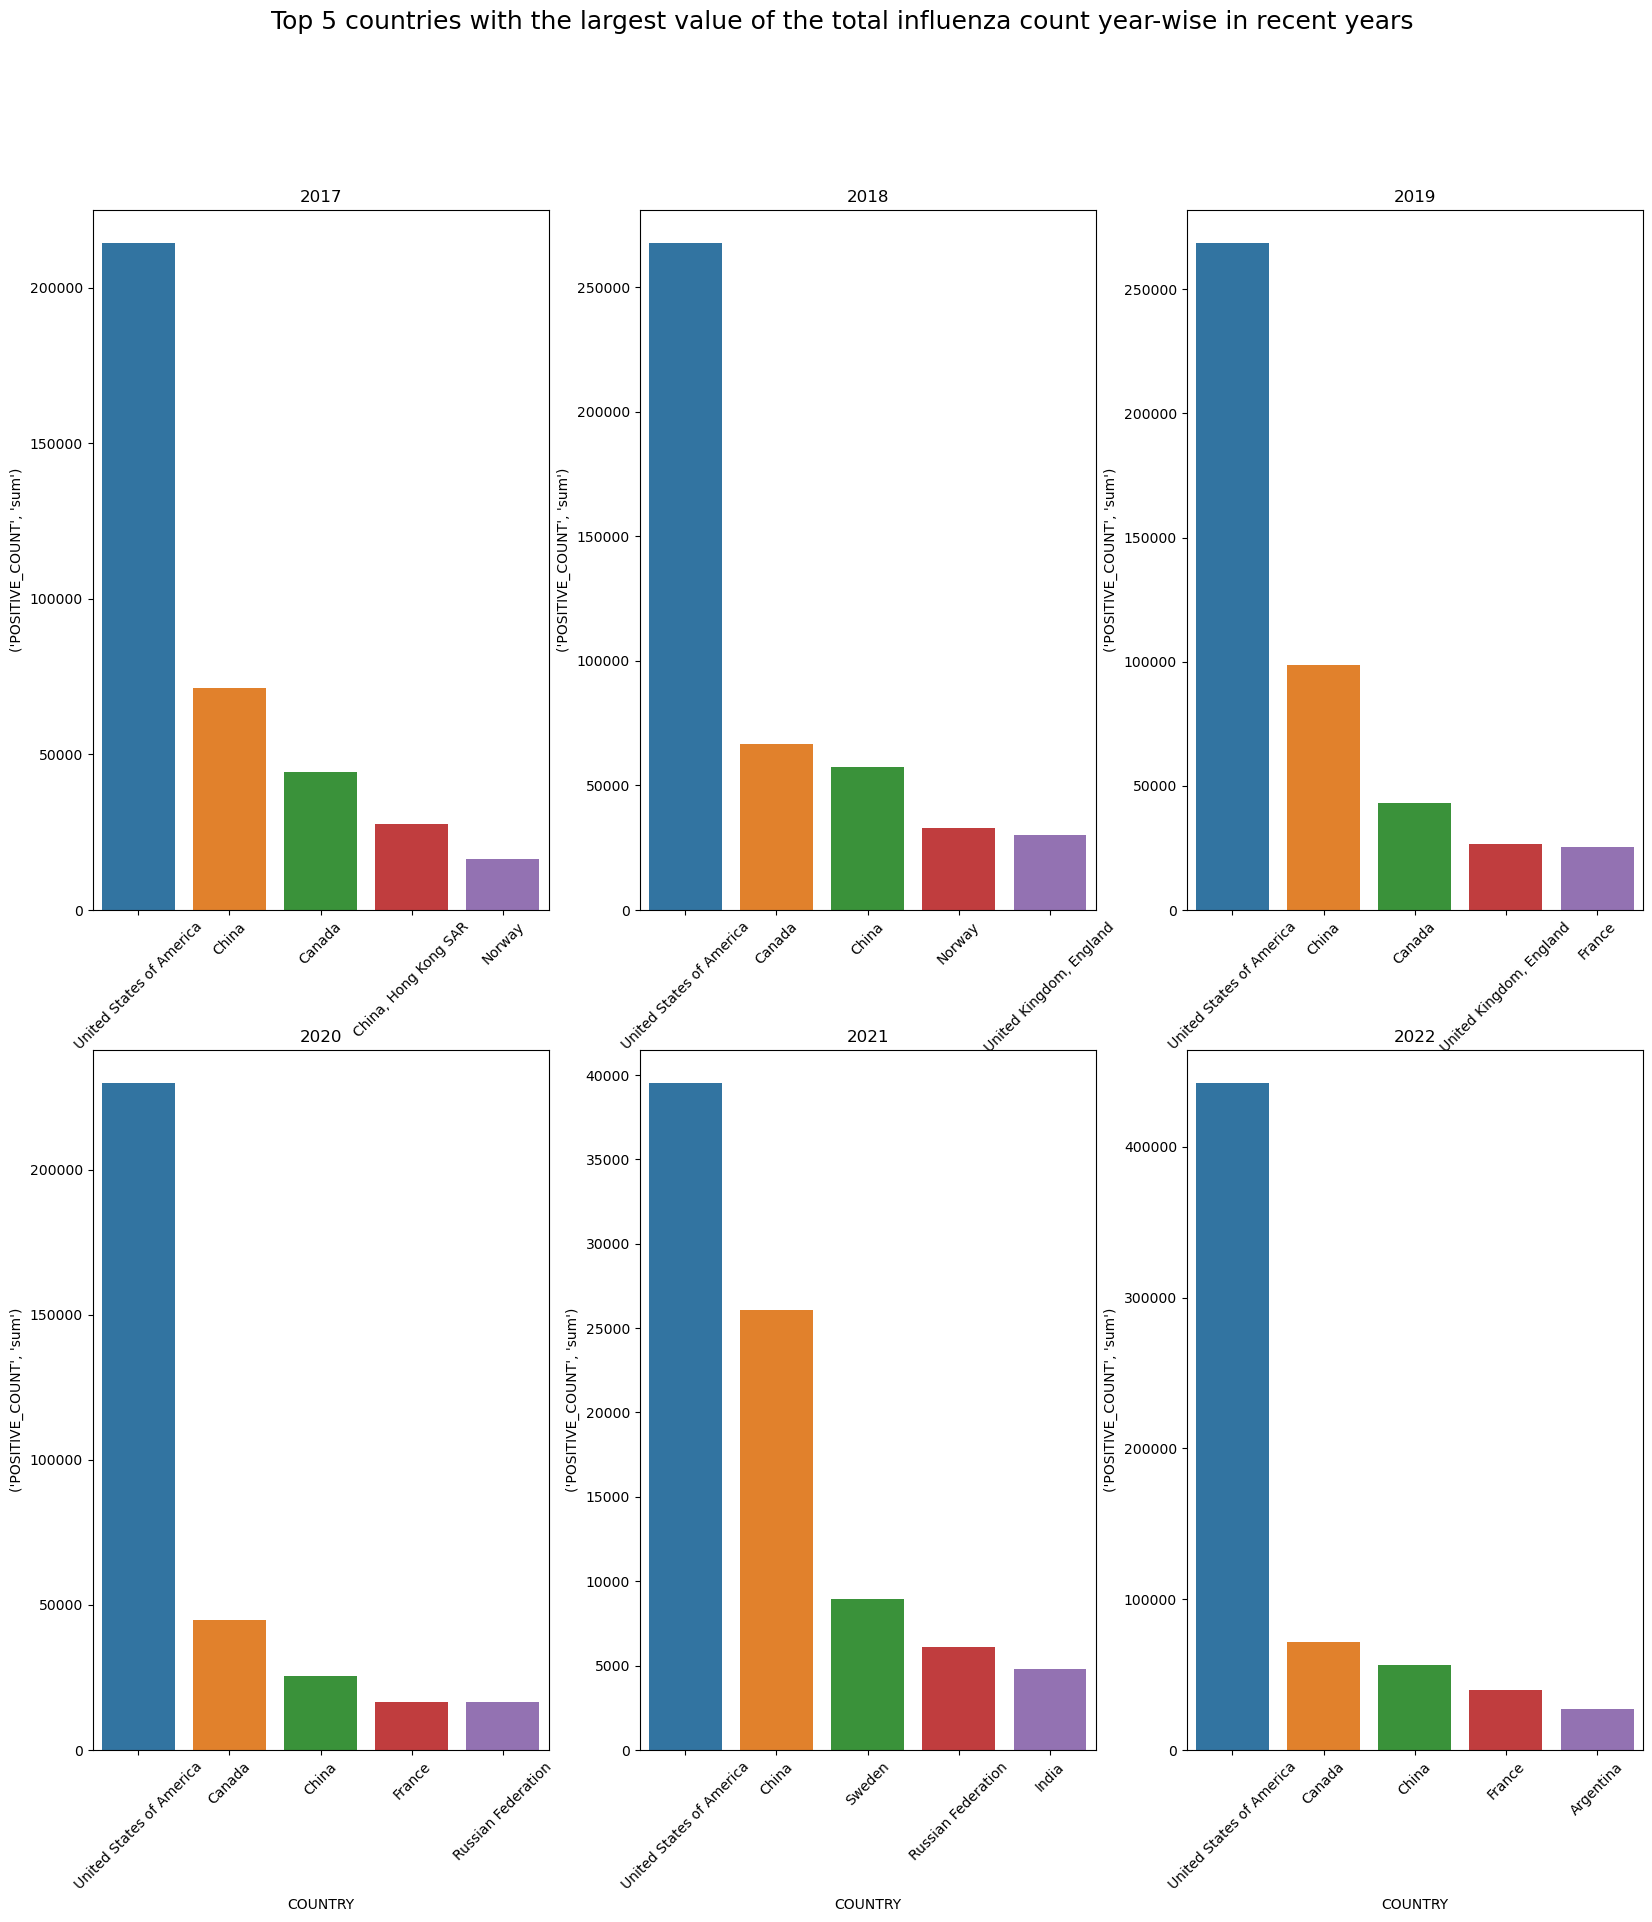

In [ ]:
import matplotlib.pyplot as plt
# Obtaining the countries in the order of the yearly highest recorded values of the influenza virus
years_list=[2008,2009,2010,2017,2018,2019,2020,2021,2022]
last_years_flu=total_infl[total_infl['YEAR'].isin(years_list)]
dfl=last_years_flu.groupby(['YEAR','COUNTRY']).agg({'POSITIVE_COUNT':['sum'],'TOTAL_SPECIMENS':['sum']})
dfl=dfl.sort_values(by=( 'POSITIVE_COUNT', 'sum'),ascending=False)
# For the years 2017-2021,determining the top 5 countries with the largest value of the total influenza count year-wise
df_years_group=dfl.groupby('YEAR')
fig, axes = plt.subplots(2,3,figsize=(20,20))
fig.suptitle("Top 5 countries with the largest value of the total influenza count year-wise in recent years", fontsize=18)
year_list1=[2017,2018,2019]
for i,year in enumerate(year_list1):
    df_grp = df_years_group.get_group(year)[:5]
    df_grp=df_grp.reset_index()
    sns.barplot(data=df_grp,x='COUNTRY',y=('POSITIVE_COUNT','sum'), ax=axes[0,i]).set(title=year)
    axes[0,i].set_xticklabels(axes[0,i].get_xticklabels(), rotation = 45)
year_list2=[2020,2021,2022]
for i,year in enumerate(year_list2):
    df_grp = df_years_group.get_group(year)[:5]
    df_grp=df_grp.reset_index()
    sns.barplot(data=df_grp,x='COUNTRY',y=('POSITIVE_COUNT','sum'), ax=axes[1,i]).set(title=year)
    axes[1,i].set_xticklabels(axes[1,i].get_xticklabels(), rotation = 45)

The above plots show the top 5 countries with the largest count of the of influenza virus year from 2017-2021.The total influenza count corresponding to the year and country has been plotted in the Y-axis and X-axis consists of the counties ordered from highest to lowest based on the total influenza count.

 American Continent was previously found to have the largest recorded values of the cases. It is found that country wise,United States of America has the highest recorded value of influenza cases in all the years and it is significantly higher compared to the other countries .It is also interesting to note that Canada,another country from the American region also ranks in the top 3 of the countries with the highest count of influenza cases in most years.Thiscombined effect has played in a significant role in high values of cases in American continent region ranking in the highest cases.

China also ranks in the top 3 countries with largest count.
Following this European countries like France and Norway, and UK are also present in the top  5 countries with the highest influenza cases.

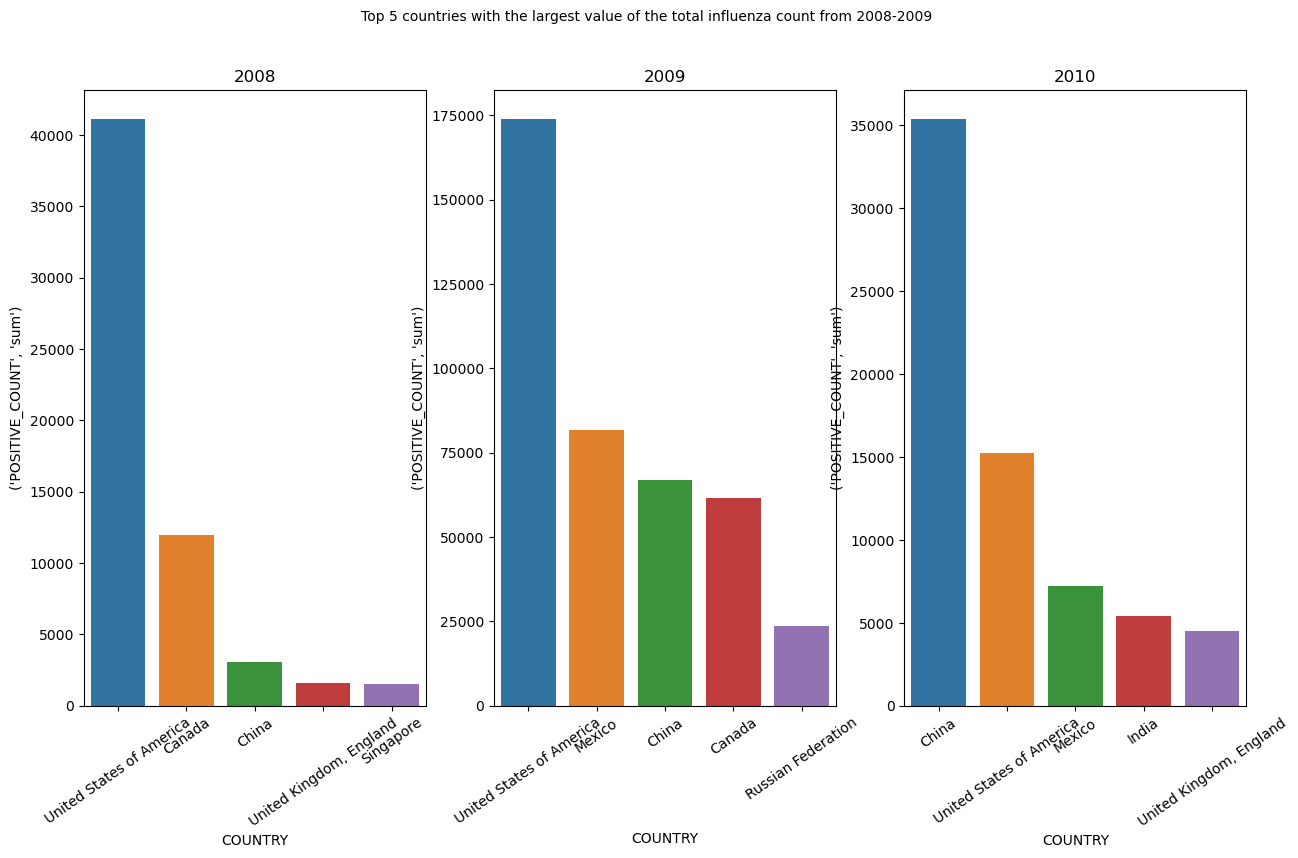

In [ ]:
year_list3=[2008,2009,2010]
fig, axes = plt.subplots(1,3,figsize=(15,8))
fig.suptitle("Top 5 countries with the largest value of the total influenza count from 2008-2009", fontsize=10)
for i,year in enumerate(year_list3):
    df_grp = df_years_group.get_group(year)[:5]
    df_grp=df_grp.reset_index()
    sns.barplot(data=df_grp,x='COUNTRY',y=('POSITIVE_COUNT','sum'), ax=axes[i]).set(title=year)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 35)
plt.show()

As 2009 had sharp rises in overall cases worldwide and in American region and there was a sudden drop in 2010 with rise in western pacific,the country wide distribution was checked.

US was responsible for the sudden high cases in 2009 and mexico from south American region also contributed to the largest cases.In 2010,China had a huge rise in cases which could be the cause of western Pacific having the largest cases in 2010.


From the above plots,the following observations are clear.

**United States of America is strongly affected by influenza and contribute to the largest influenza cases in most of the years worldwide.US coupled with Canada in many years contribute to the overall proportion of large cases in American region.**

**Unites States has contiued to be an adversely affected country by influenza in the recent years.China and Canada also continue to be the top affected countries.However the recent years show some changes in the top 5 affected countries worldwide with European countries like Norway,France,Sweden and Argentina emerging into the picture.

**US is largely responsible for the sudden high cases in 2009 and 2022.**

**Anlysis will be done later to check if a particular newly emerged virus type caused the sharp changes in 2009 and 2022.**

This information could help in future tracking ,controlling spread,unearthing causes on why certain countries are repeatedly affected more, better focussing the treatment and prevention plans.It also could help in understanding if any patterns exist in countries affected the most when sudden outbreaks happen.

## TIME SERIES PLOTS AND SEASONALITY TRENDS IN US

Due to its highest recorded cases over several years,US will be explored further.
From the descriptive statistics calculation previosuly, which indicated a positive skew of the distributions of influenza count was expected .
This could indicate a possible seasonality in trends due to large values of very few cases present.The differences between the mean and median was substantial especially in American region and US accounts for most of the cases in American region as observed previously.So to investigate if seasonal trends are present in the incidence of the disease and to understand the variation across the months,the following analysis has been carried out.

The following analysis could shed light on:
 - Is there a seasonality in the influenza trends and what is the common trend?
 - Is there a relationship between the influenza cases and specific weeks in a year and has the relationship changed over the years?

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

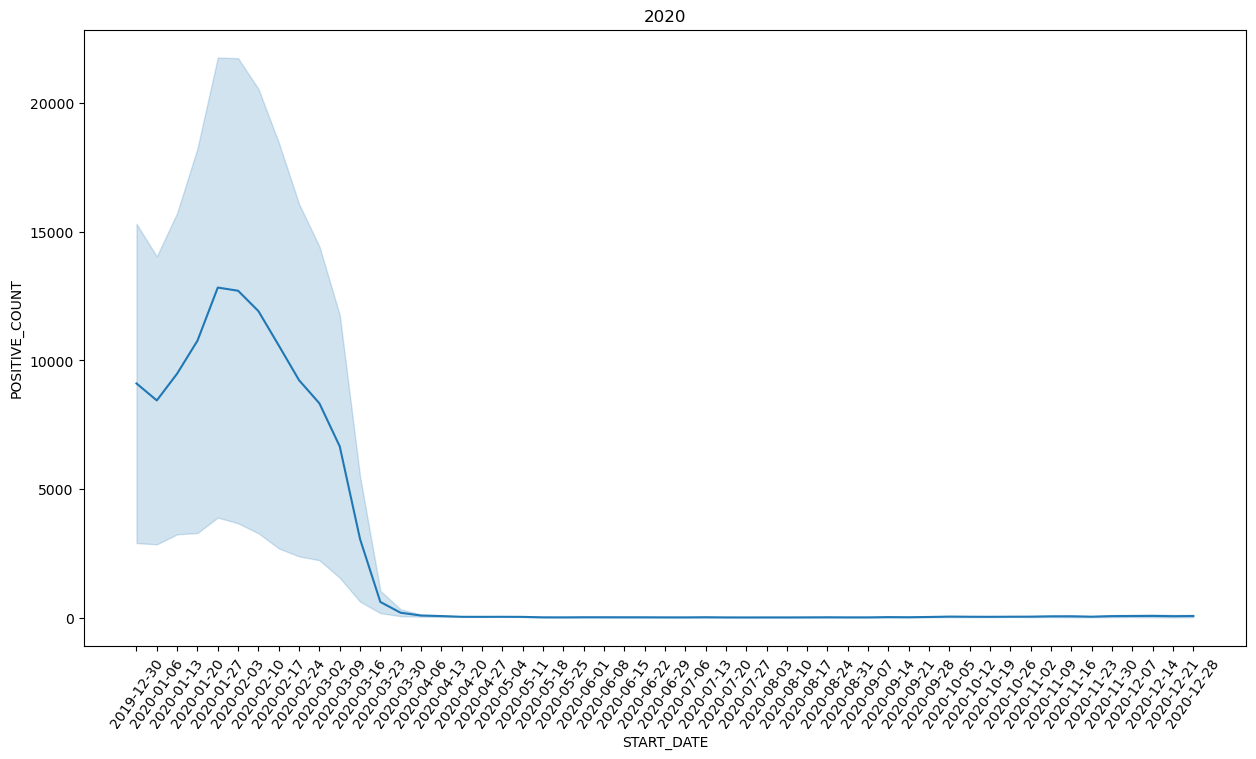

In [ ]:
#United states total influenza count by year has been selected
inf_US=Flunet_new[Flunet_new['COUNTRY']=='United States of America']
inf_US=inf_US[inf_US['RESPIRATORY_VIRUS']=='INF_ALL']
# Selecting the the years from 2020-2023
inf_US2020=inf_US[inf_US['YEAR']==2020].sort_values(by='START_DATE')
fig, axes = plt.subplots(1,1,figsize=(15,8))
sns.lineplot(x = "START_DATE", y = "POSITIVE_COUNT", data = inf_US2020).set(title='2020')
plt.xticks(rotation=55)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

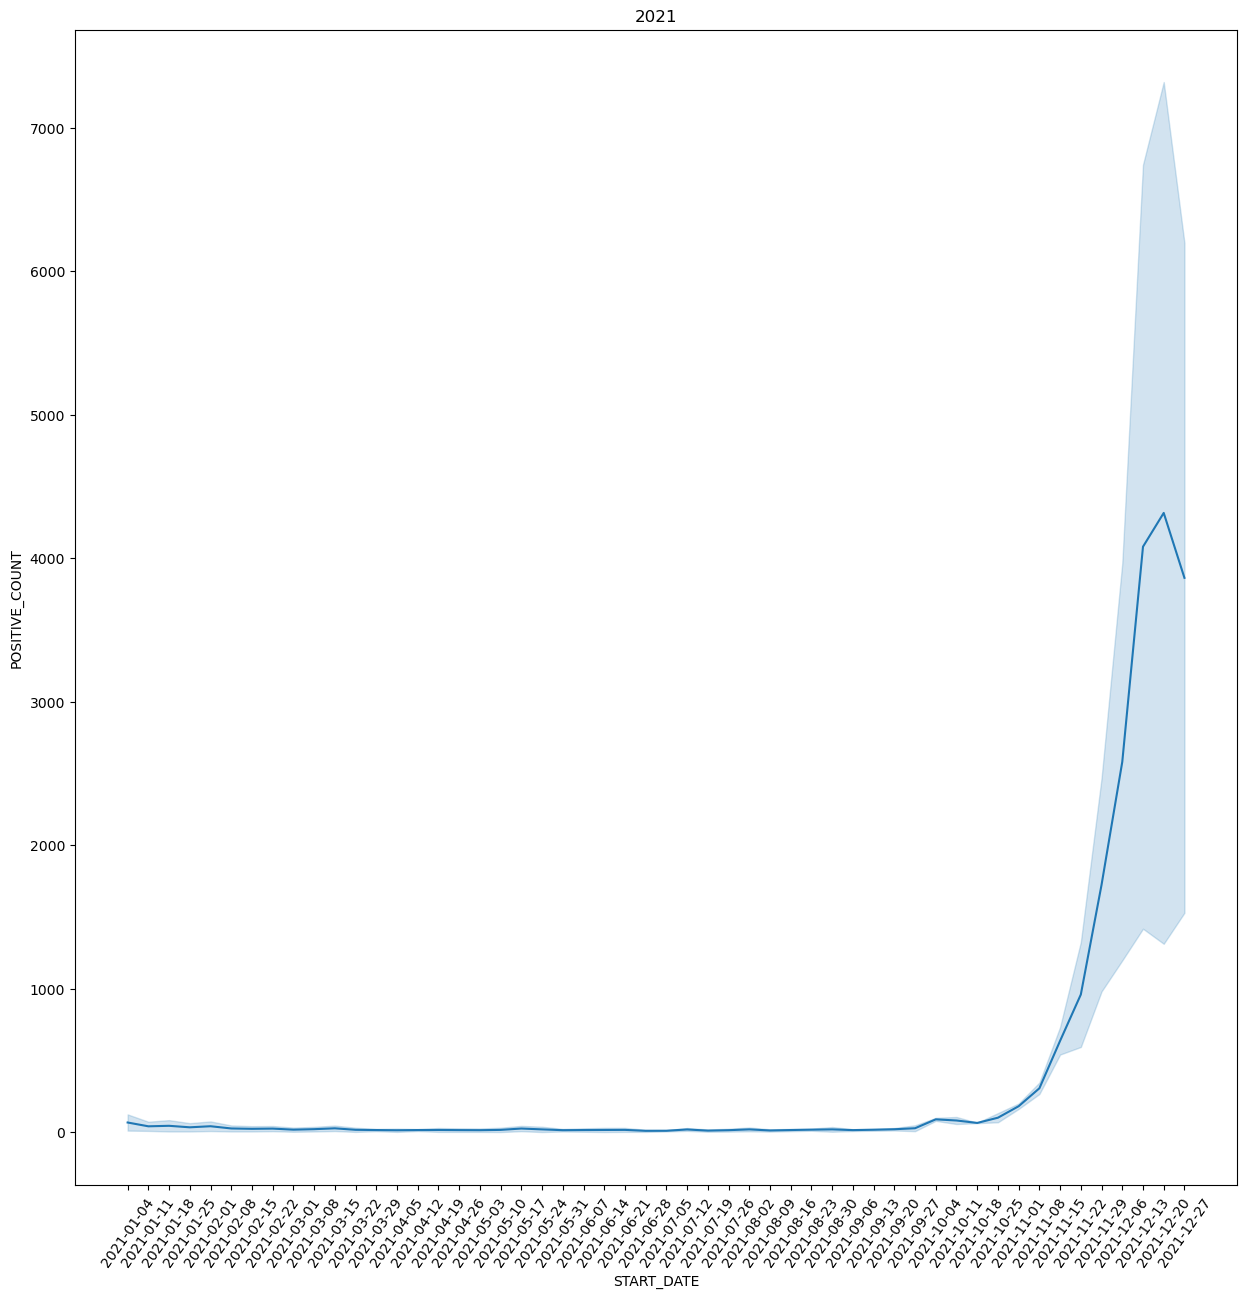

In [ ]:
plt.figure(figsize=(15,15))
sns.lineplot(x = "START_DATE", y = "POSITIVE_COUNT", data = inf_US2021).set(title='2021')
plt.xticks(rotation=55)

**There is seasonality that is observed from the time series plots.**

The flu peaks during the winter period.There are periods with no cases too.In 2020,the flu reached its peak value in the month of January gradually decreasing during the mid of march. In 2021,the flu cases start increasing from october and reach the peak in December.

<AxesSubplot:xlabel='WEEK', ylabel='POSITIVE_COUNT'>

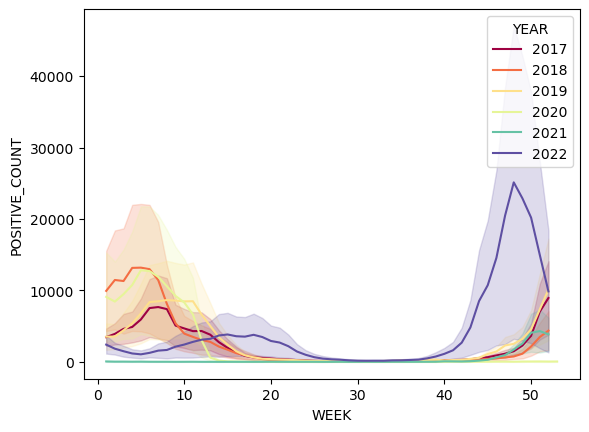

In [ ]:

columns_list = ['WEEK','POSITIVE_COUNT']
columns_list
year_list =[2017,2018,2019,2020,2021,2022]
inf_US_lastyrs=inf_US[inf_US['YEAR'].isin(year_list)]
sns.lineplot(data=inf_US_lastyrs, x="WEEK", y="POSITIVE_COUNT",hue='YEAR',palette='Spectral')

The above chart has been plotted to understand if any relationship exists between influenza cases and weeks in a year.

**There is no linear relationship between total influenza_cases and weeks in a year.There appears to be a non-linear relationship between trends and weeks.
 There is a seasonality that is observed within the trends.Flu cases are more within the first 10 weeks and last 5 weeks of the year.Except 2022, weeks between 15 to 40 have negligible cases compared to other weeks in other years.**

**Many years like 2017-2020 showed cases rising rapidly within the first 10 weeks,raising the peaks and eventually falling.Some years have some amount of cases recorded in the last few weeks of the year.2022 shows a pattern that is markedly different from other years.Cases reach a peak around week 15 and even persist after week 20.There reach a very high peak once again between week 40 and 50 that is very high compared to the previous years and even much early.**

In the region-wise and country-wise plots,a sharp increase in the total number of cases was observed in 2022. This trend in the US could have also significantly contibuted to the overall rise in cases in 2022.

EDA-phase 2 showed similar different trends in 2022 for China and Canada too (other countries with large influenza count). Due to a sudden change in 2022 ,it would be interesting to explore the virus type to see if it shows some changes for 2022.

## RESPIRATORY VIRUS ANALYSIS

This analysis could shed light on:

> - Is a particular virus type and subtype more contagious?
>-  Did a new virus emerge in 2009,that caused sharp rise in cases
> - Has a new virus subtype emerge in years with sudden high cases causing sharp increase in cases in 2022?



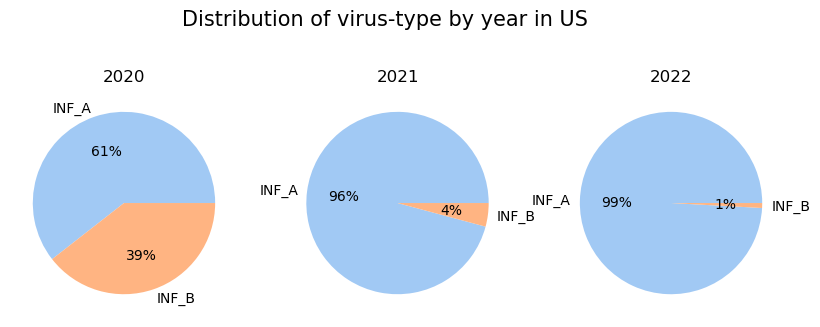

In [ ]:
# Due to the large contribution of cases worldwide from US,it has been explored further
resp_US=Flunet_new[Flunet_new['COUNTRY']=='United States of America']
resp_US_AB=resp_US[(resp_US['RESPIRATORY_VIRUS']=='INF_A') | (resp_US['RESPIRATORY_VIRUS']=='INF_B')]
resp_US_ABgp = resp_US_AB.groupby(['YEAR','RESPIRATORY_VIRUS']).POSITIVE_COUNT.aggregate(Influenza_sum='sum')
resp_US_ABgp
fig, axes = plt.subplots(1,3,figsize=(10,4))
years_list=[2020,2021,2022]
resp_US_ABgp=resp_US_ABgp.reset_index()
fig.suptitle("Distribution of virus-type by year in US", fontsize=15)
for i,year in enumerate(years_list):
    dftemp=resp_US_ABgp[resp_US_ABgp['YEAR']==year]
    colors = sns.color_palette('pastel')
    axes[i].pie(dftemp['Influenza_sum'], labels= dftemp['RESPIRATORY_VIRUS'], colors=colors, autopct='%.0f%%')
    axes[i].set_title(year)
# displaying chart
plt.show()


The pie chart has been plotted to understand the distribution of cases caused by virus of type A and type B.The years close to 2022 have been chosen to better understand the sudden change that was observed in 2022.

INF_A and INF_B represent the influenza cases of type A and type B respectively.

**From the pie chart it is evident that Type=A is the more contagious virus types in these years.Also the percentage of influenza cases due to the contribution of A is found to increase significantly over the years from 2020 to 2022.**


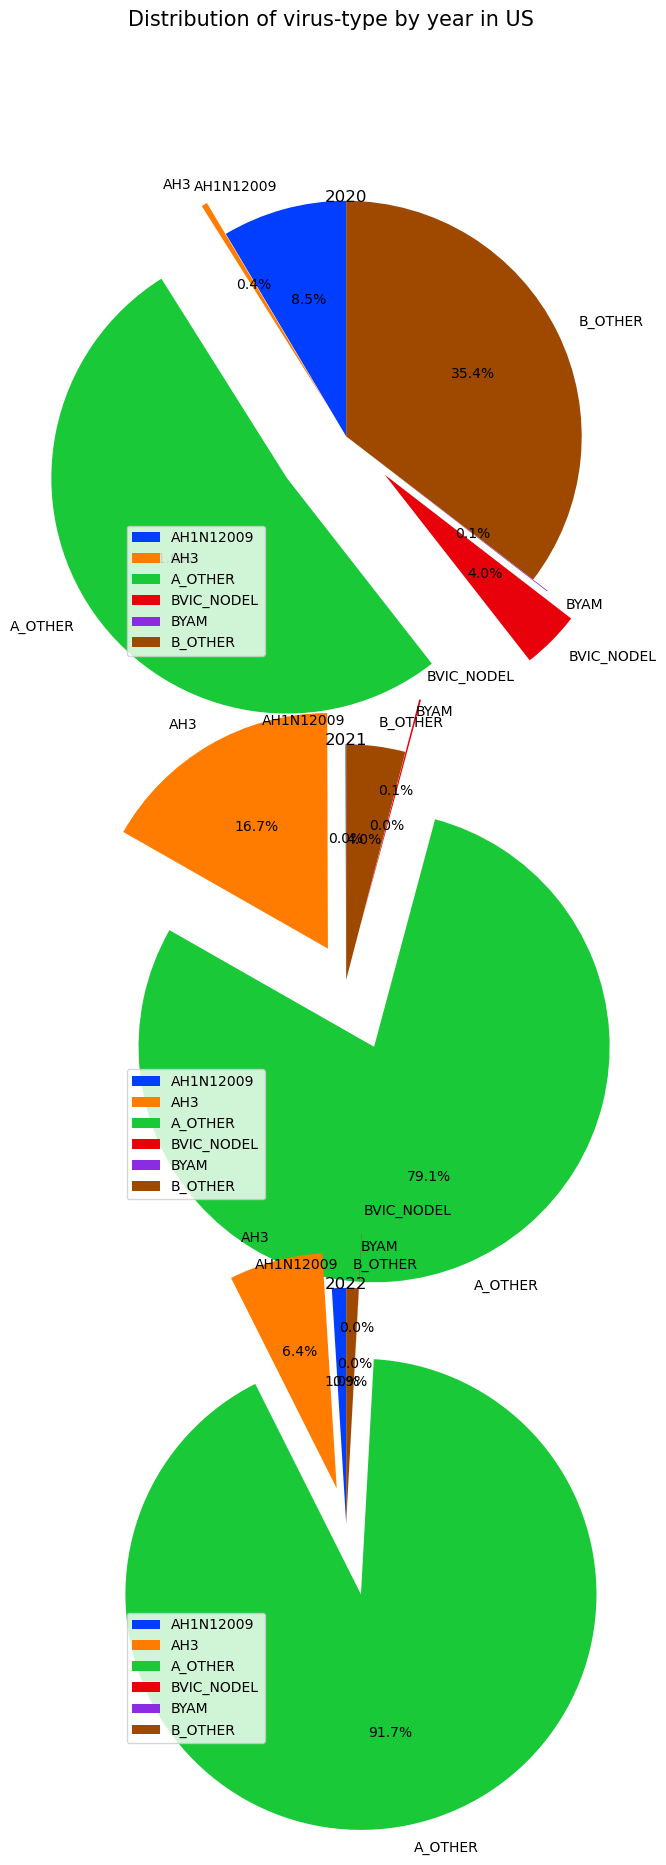

In [ ]:
resp_US=Flunet_new[Flunet_new['COUNTRY']=='United States of America']
AorB=['AH1N12009','AH1','AH3','AH5','AH7N9','A_OTHER','BVIC_2DEL','BVIC_3DEL','BVIC_NODEL','BVIC_DELUNK','BYAM','B_OTHER']
resp_US_AorB=resp_US[resp_US['RESPIRATORY_VIRUS'].isin(AorB)]
resp_US_AorB = resp_US_AorB.groupby(['YEAR','RESPIRATORY_VIRUS']).POSITIVE_COUNT.aggregate(Influenza_sum='sum')
fig, axes = plt.subplots(3,1,figsize=(12,20))
years_list=[2020,2021,2022]
resp_US_AorB=resp_US_AorB.reset_index()
fig.suptitle("Distribution of virus-type by year in US", fontsize=15)
for i,year in enumerate(years_list):
    df1temp=resp_US_AorB[resp_US_AorB['YEAR']==year]
    colors = sns.color_palette('bright')
    explode = (0, 0.2, 0.4, 0.3, 0.1, 0)
    axes[i].pie(df1temp['Influenza_sum'], explode=explode,labels= df1temp['RESPIRATORY_VIRUS'], colors=colors,autopct='%.1f%%',startangle=90,radius=1.3)
    axes[i].set_title(year)
    axes[i].legend(loc="lower left")

# Equal aspect ratio ensures that pie is drawn as a circle.

The pie charts has been plotted with some exploding parts to prevent the overlap of the labels.

To further understand the distribution due to the subcategory of virus,the above pie chart has been plotted.

**It is found that among the more contagious virus type-A, A_OTHER has causes a significant proportion of cases.This indicates that the virus is of influenza type A but it has not been subtyped.**

In 2020 AH1N12009 has been a larger contributer of the cases following A_OTHER,but in the 2021 and 2022, AH3 has greater cases following A_OTHER.

**Therefore in 2022,the year with sharp rise in cases,a significant portion of the cases are due to Influenza type A,but of unknown subtype of A.**

#### Analysis virus type-2022

2022 showed sudden rise in cases in US and also worlwide.Worldwide too,the seasonality trend showed marked difference in 2022

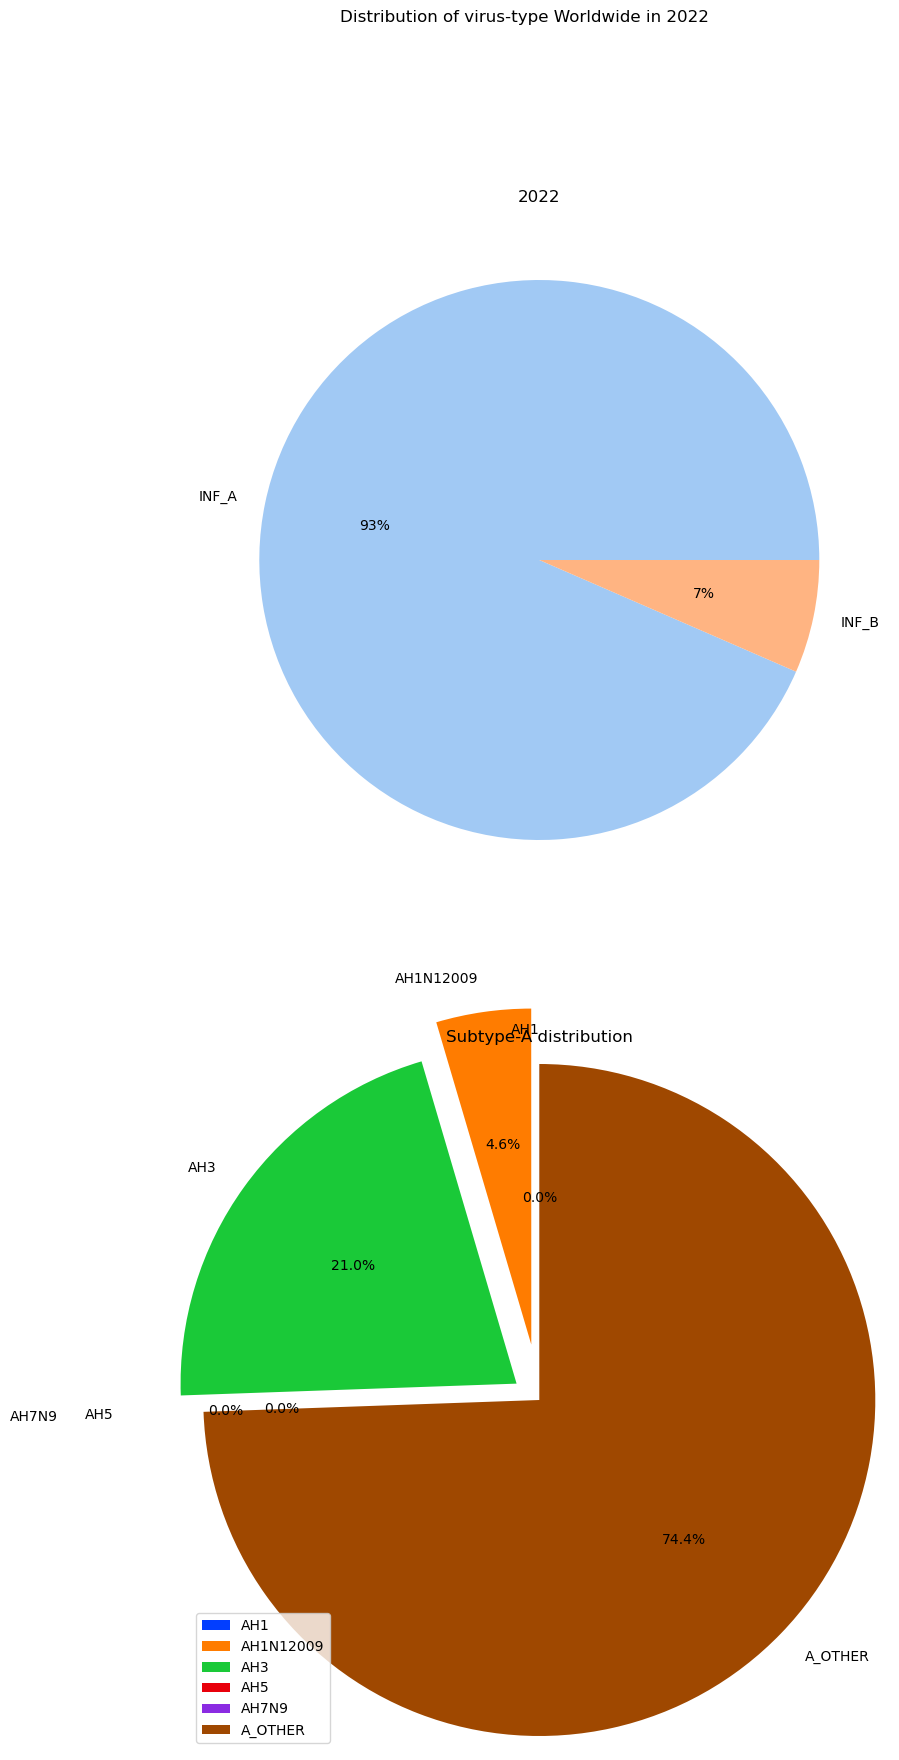

In [ ]:

resp_world_AB=Flunet_new[(Flunet_new['RESPIRATORY_VIRUS']=='INF_A') | (Flunet_new['RESPIRATORY_VIRUS']=='INF_B')]
resp_world_AB = resp_world_AB.groupby(['YEAR','RESPIRATORY_VIRUS']).POSITIVE_COUNT.aggregate(Influenza_sum='sum')
A=['AH1N12009','AH1','AH3','AH5','AH7N9','A_OTHER']
resp_world_A=Flunet_new[Flunet_new['RESPIRATORY_VIRUS'].isin(A)]
resp_world_A = resp_world_A.groupby(['YEAR','RESPIRATORY_VIRUS']).POSITIVE_COUNT.aggregate(Influenza_sum='sum')
fig, axes = plt.subplots(2,1,figsize=(12,20))
fig.suptitle("Distribution of virus-type Worldwide in 2022", fontsize=12)
resp_world_A =resp_world_A .reset_index()
resp_world_AB =resp_world_AB .reset_index()
AB=resp_world_AB[resp_world_AB['YEAR']==2022]
colors1 = sns.color_palette('pastel')
axes[0].pie(AB['Influenza_sum'], labels= AB['RESPIRATORY_VIRUS'], colors=colors1, autopct='%.0f%%')
axes[0].set_title(year)
A2022=resp_world_A[resp_world_A['YEAR']==2022]
colors = sns.color_palette('bright')
explode = (0, 0.2, 0.1, 0.2, 0.4, 0)
axes[1].pie(A2022['Influenza_sum'],explode=explode,labels= A2022['RESPIRATORY_VIRUS'], colors=colors,autopct='%.1f%%',startangle=90,radius=1.2)
axes[1].set_title("Subtype-A distribution")
axes[1].legend(loc="lower left")
plt.show()

The worldwide contribution has been explored in 2022 to check for any possible variation compared to US.

As virus A has contributed to a significant proportion of cases,it has been ventured in more detail for the world wide situation. Worldwide too, A_OTHER has the highest contribution to type A virus cases.This is followed by AH3 and AH1N12009.Other A subtypes amount to a negligible portion of cases.

As the contribution from A_Other virus has increased in the years leading to and in 2022,there is a possibility of a new virus subtype of A that is highly contagious but has not yet been subtyped.


#### Analysis for 2009

2009 witnessed a sharp rise in cases in America compared to its adjacent years,so years close to 2009 have been investigated to check for virus type contributing to this change.

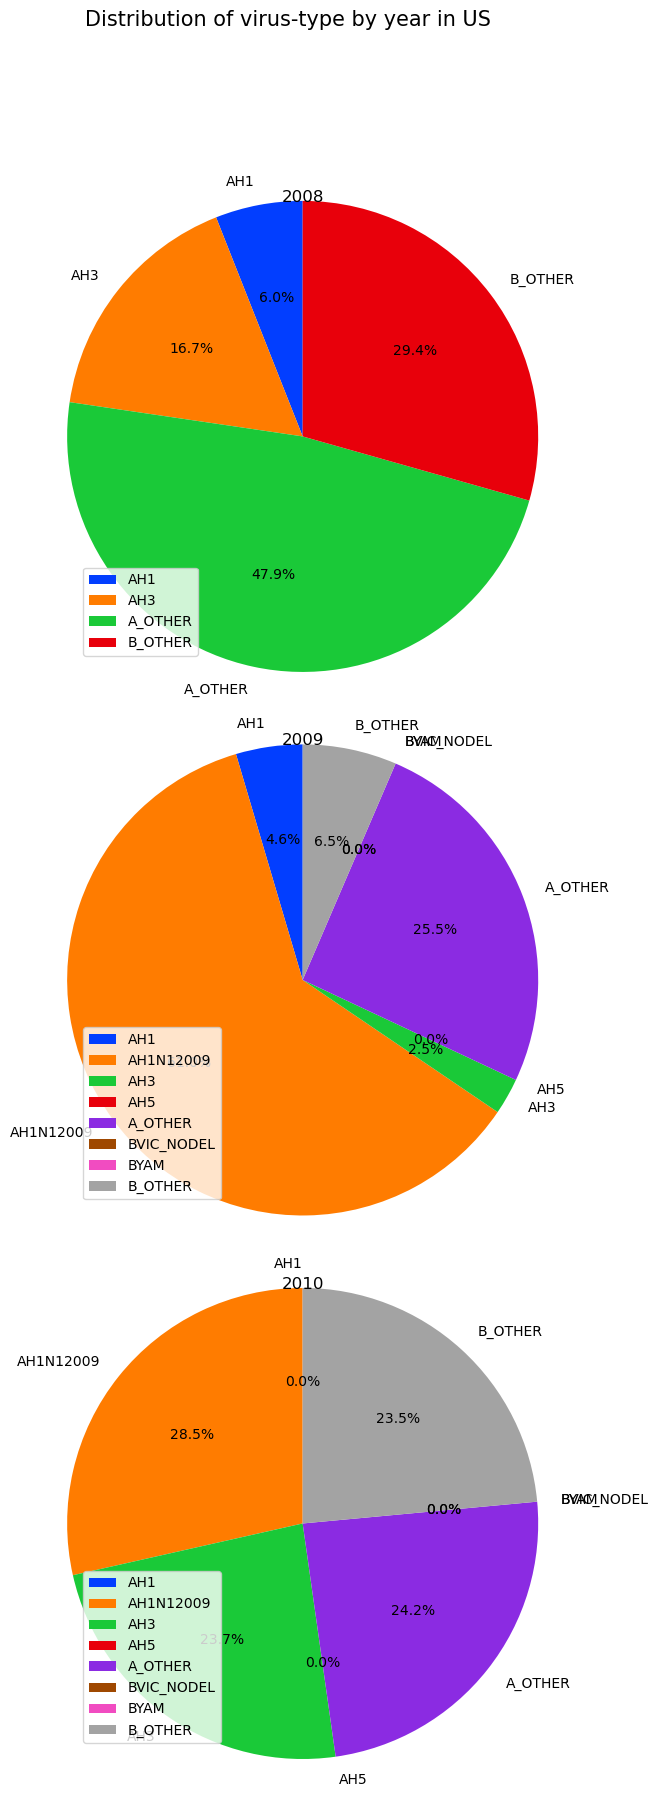

,YEAR,RESPIRATORY_VIRUS,Influenza_sum
49,2009,AH1N12009,105982.0
52,2009,A_OTHER,44382.0
46,2008,A_OTHER,19705.0
47,2008,B_OTHER,12082.0
55,2009,B_OTHER,11227.0
48,2009,AH1,7947.0
45,2008,AH3,6859.0
57,2010,AH1N12009,4350.0
50,2009,AH3,4344.0
60,2010,A_OTHER,3697.0


In [ ]:
resp_US=Flunet_new[Flunet_new['COUNTRY']=='United States of America']
AorB=['AH1N12009','AH1','AH3','AH5','AH7N9','A_OTHER','BVIC_2DEL','BVIC_3DEL','BVIC_NODEL','BVIC_DELUNK','BYAM','B_OTHER']
resp_US_AorB1=resp_US[resp_US['RESPIRATORY_VIRUS'].isin(AorB)]
resp_US_AorB1 = resp_US_AorB1.groupby(['YEAR','RESPIRATORY_VIRUS']).POSITIVE_COUNT.aggregate(Influenza_sum='sum')
fig, axes = plt.subplots(3,1,figsize=(12,20))
yea=[2008,2009,2010]
resp_US_AorB1=resp_US_AorB1.reset_index()
fig.suptitle("Distribution of virus-type by year in US", fontsize=15)
for i,year in enumerate(yea):
    df1temp=resp_US_AorB1[resp_US_AorB1['YEAR']==year]
    colors = sns.color_palette('bright')
    #explode = (0, 0.2, 0.4, 0.3, 0.1, 0)
    axes[i].pie(df1temp['Influenza_sum'],labels= df1temp['RESPIRATORY_VIRUS'], colors=colors,autopct='%.1f%%',startangle=90,radius=1.3)
    axes[i].set_title(year)
    axes[i].legend(loc="lower left")
# displaying cha

#fig1, ax1 = plt.subplots()
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colours)

# Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# To check for highest count of influenza cases yearwise and by type in the years 2008-2010
AB_list=resp_US_AorB1[resp_US_AorB1['YEAR'].isin(yea)]
AB_list=AB_list.sort_values(by='Influenza_sum',ascending=False)
AB_list.head(10)

As expected,a new virus type that has emerged in 2009 which was highly contagious and accounted for a huge portion of the cases in 2009.This virus of type A and is of subtype  AH1N12009 has caused a sudden rise in the cases in 2009.

From 2010,the contribution of this virus to the total number of cases has reduced but it still contributes to some portion of the cases of virus type A even in 2022.In 2010,the total cases contributed from this virus type dropped.
The contribution of B-subtype to the total cases also fell from 2009.

It is interesting to note than before 2009, A_OTHER followed by B_OTHER were significant contributers to the total influenza cases.


In [ ]:
# To check for highest count of influenza cases yearwise and by type in the last few years
dec=[2018,2019,2020,2021,2022]
AB_list=resp_US_AorB1[resp_US_AorB1['YEAR'].isin(dec)]
AB_list=AB_list.sort_values(by='Influenza_sum',ascending=False)
AB_list.head(20)

,YEAR,RESPIRATORY_VIRUS,Influenza_sum
142,2022,A_OTHER,405630.0
124,2019,A_OTHER,168180.0
118,2018,A_OTHER,148532.0
130,2020,A_OTHER,118587.0
133,2020,B_OTHER,81345.0
121,2018,B_OTHER,75581.0
127,2019,B_OTHER,51434.0
136,2021,A_OTHER,31240.0
141,2022,AH3,28449.0
122,2019,AH1N12009,22943.0


The total number of cases from AH1N12009 is lesser than 2009 and dropped in number  from 2019 to 2022.The highest cases are from A_OTHER and B_OTHER( not-subtyped cases of A and B).

## ANALYSIS OF ILI ILLNESS(SERIOUS ACUTE RESPIRATORY ILLNESS AND FATALITIES)

The following analysis is being performed to better understand reported cases of influenza like illness(includes respiratory tract diseases caused by virus with symptoms similar to Influenza) by countries and in the recent years.

Also the seriousness of the disease has been investigated through examining acute respiratory illness(ARI) and seriously acute respiratory cases illness (SARI).


In [ ]:
Fluid_new = pd.read_csv("Cleaned_FLUID.csv")
Fluid_new.drop(['Unnamed: 0'], axis=1,inplace=True)
Fluid_new.head()
Fluid_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401640 entries, 0 to 401639
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   WHO_REGION       401640 non-null  object 
 1   COUNTRY          401640 non-null  object 
 2   START_DATE       401640 non-null  object 
 3   YEAR             401640 non-null  int64  
 4   WEEK             401640 non-null  int64  
 5   ORIGIN_SOURCE    401640 non-null  object 
 6   AGEGROUP_CODE    401640 non-null  object 
 7   ILI_CASES        401640 non-null  float64
 8   ILI_OUTPATIENTS  401640 non-null  float64
 9   SARI_CASES       401640 non-null  float64
 10  SARI_DEATHS      401640 non-null  float64
 11  ARI_CASES        401640 non-null  float64
 12  ARI_OUTPATIENTS  401640 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 39.8+ MB


In [ ]:
# Countries ordered by the highest count of Influenza like Illness cases in recent years
years=[2019,2020,2021,2022,2023]
FLUID_YRS=Fluid_new[Fluid_new['YEAR'].isin(years)]
fluidgrp= FLUID_YRS.groupby(['YEAR','COUNTRY']).ILI_CASES.aggregate(ILI_cases='sum').sort_values(by='ILI_cases',ascending=False)
fluidgrp.head(20)

ILI_cases
YEAR COUNTRY                            
2022 United States of America  6351484.0
     France                    5847234.0
2019 France                    4415464.0
     Thailand                  4097589.0
2020 United States of America  3561997.0
     France                    3439122.0
2019 United States of America  3230660.0
2021 United States of America  3208131.0
     Mexico                    1614265.0
     France                    1602462.0
2019 Argentina                 1602091.0
2022 Mexico                    1403576.0
     Argentina                 1293331.0
2020 Mexico                    1030656.0
2019 Brazil                     908814.0
2020 Argentina                  634022.0
     Thailand                   624795.0
2023 France                     570216.0
2022 Serbia                     527275.0
2019 Mongolia                   473046.0

For ILI cases, US has the highest recorded value of total ILI cases in 2022,2021 and 2020.It is also among the highest recorded value of total ILI cases in 2019. France and Mexico are also among the top few countries with the highest value of recorded ILI cases in recent years.

In [ ]:

fluidgrp2= FLUID_YRS.groupby(['YEAR','COUNTRY']).ARI_CASES.aggregate(ARI_CASES='sum').sort_values(by='ARI_CASES',ascending=False)
fluidgrp2.head(20)

ARI_CASES
YEAR COUNTRY                       
2022 Russian Federation  39791908.0
2021 Russian Federation  35399918.0
2022 Mexico              30501460.0
2020 Russian Federation  29869903.0
2019 Russian Federation  28378514.0
2022 Spain               22316773.0
     Colombia            15593288.0
2019 Colombia            13412648.0
2021 Ukraine             12765036.0
2022 France              11215006.0
2020 Ukraine             10482121.0
2019 Ukraine             10193672.0
2021 Colombia             9914730.0
2022 Ukraine              8740669.0
2020 Colombia             8700890.0
2021 Belarus              5862254.0
2022 Belarus              5710827.0
     Finland              5666444.0
2021 France               4616098.0
2022 Peru                 4529486.0

For ARI(Acutre respiratory illness) cases, Russia has the highest recorded value of total ILI cases in 2022,2021 and 2020 and 2019. Columbia,Ukraine and Mexico are also among the top few countries with the highest value of recorded ARI cases in recent years.

In [ ]:
# Countries ordered by the highest count of SARI cases in recent years

fluidgrp1= FLUID_YRS.groupby(['YEAR','COUNTRY']).SARI_CASES.aggregate(SARI_cases='sum').sort_values(by='SARI_cases',ascending=False)
fluidgrp1.head(20)

SARI_cases
YEAR COUNTRY               
2021 Mexico        277801.0
     Niger         252212.0
2022 Mexico        128887.0
2021 Argentina     122408.0
2022 Spain         103500.0
2020 Mexico        101520.0
     Argentina      84797.0
2019 Brazil         79976.0
     Argentina      76332.0
2020 Niger          75078.0
2021 Spain          71804.0
2022 Argentina      69576.0
     Germany        65672.0
2021 Germany        62956.0
2019 Niger          56723.0
     Mongolia       54713.0
2022 Kazakhstan     52376.0
2021 Mongolia       51825.0
     Paraguay       46352.0
     Belarus        38708.0

Mexico has the highest recorded value of SARI(Seriously acute respiratory illness) cases in 2021,2020,2022.Argentina,Spain and Germany are also among countries with the highest SARI cases.

In [ ]:
# Countries ordered by the highest count of SARI deaths in recent years

fluidgrp3= FLUID_YRS.groupby(['YEAR','COUNTRY']).SARI_DEATHS.aggregate(SARI_deaths='sum').sort_values(by='SARI_deaths',ascending=False)
fluidgrp3.head(20)

SARI_deaths
YEAR COUNTRY                                      
2020 Mexico                               213728.0
2021 Mexico                               170300.0
2022 Mexico                                39718.0
     Lao People's Democratic Republic      17566.0
2021 Paraguay                              13266.0
2019 Ecuador                               10556.0
2022 Paraguay                               6248.0
2020 Paraguay                               6096.0
2021 Germany                                4241.0
2019 Mexico                                 3430.0
2021 Mongolia                               3264.0
     Chile                                  2478.0
2022 Chile                                  1991.0
2020 Kazakhstan                             1789.0
2019 Colombia                               1704.0
2021 Ecuador                                1637.0
2020 Chile                                  1574.0
     Germany                                1481.0
2021 Albania                                1305.0
2019 Côte d'Ivoire                          1212.0

From the above tables,it is evident that US has the highest recorded values of ILI cases in 2022 and continues to be among the top countries in influenza like illness cases reported. However the countries that rank higher based on the seriousness of the respiratory disease are different.ThoughFor instance,Russia ranks the highest in ARI_cases and continues to be among the top countries in ARI cases reported.

For SARI and SARI deaths,Mexico ranks the highest in ARI_cases and continues to be among the top countries in ARI cases reported.Though ILI_CASES are more in US,Mexico has more incidence of severity of respiratory diseases.

From this analysis,it is evident that the severity of the disease varies according to countries.

In [ ]:
# Determining percentage deaths of SARI CASES
indexsari = FLUID_YRS[(FLUID_YRS['SARI_CASES']==0) | (FLUID_YRS['SARI_DEATHS']==0)].index
s=FLUID_YRS.drop(indexsari)
sari_reg=s.groupby(['YEAR','WHO_REGION']).agg({'SARI_CASES':['sum'],'SARI_DEATHS':['sum']})
sari_reg
sari_reg[('SARI','PERCENTAGE_DEATHS')]=sari_reg.apply(lambda x :x[('SARI_DEATHS', 'sum')]/x[('SARI_CASES', 'sum')]*100,axis=1)
sari_reg

SARI_CASES SARI_DEATHS              SARI
                       sum         sum PERCENTAGE_DEATHS
YEAR WHO_REGION                                         
2019 AFR           12555.0      1577.0         12.560733
     AMR          125692.0     16649.0         13.245871
     EMR           14584.0       444.0          3.044432
     EUR            3469.0       604.0         17.411358
     SEAR          10121.0       163.0          1.610513
     WPR           14316.0      1185.0          8.277452
2020 AFR            8544.0      1420.0         16.619850
     AMR          180310.0    224512.0        124.514447
     EMR           15939.0       428.0          2.685237
     EUR           18285.0      3645.0         19.934372
     SEAR           8631.0       147.0          1.703163
     WPR            9443.0       586.0          6.205655
2021 AFR            9183.0      1356.0         14.766416
     AMR          374384.0    189421.0         50.595378
     EMR           12717.0       388.0          3.051034
     EUR           54905.0      6417.0         11.687460
     SEAR           7655.0        65.0          0.849118
     WPR           44980.0      3484.0          7.745665
2022 AFR            9236.0       422.0          4.569078
     AMR          211454.0     49786.0         23.544601
     EMR            9364.0       556.0          5.937633
     EUR           20135.0      1737.0          8.626769
     SEAR           9501.0        85.0          0.894643
     WPR           13723.0     17984.0        131.050062
2023 AFR              80.0         8.0         10.000000
     AMR            8639.0       919.0         10.637805
     SEAR           1018.0         4.0          0.392927

#### On deeper exploration of the age groups by  many years in Mexico,except the overall age,the cases have not been reported age-wise,so it will be difficult for age-wise analysis.

# SUMMARY


## SUMMARY AND CONCLUSIONS

A thorough analysis of the data was performed.

A region-wise analysis was done by, from the results, It was found that America had the largest recorded influenza-positive cases in the various years except in 2010 and 2011.America is strongly affected by influenza and contribute a greater proportion of worldwide cases. The influenza spread has overall increased over the recent years. Marked changes were observed over the decade with the latter decade showing more positive influenza cases .Even in Europe and Western Pacific besides America, the later decade showed more increase in cases. Analysis of descriptive statistics of positive influenza count by grouping year-wise and region-wise showed signs of a positively skewed distribution. The years consistently showed many weeks with 0 or negligible cases indicating a possible seasonality which was further explored in future plots. A country-wise analysis was done to understand to explore if particular countries are responsible for the large values of cases observed in American region and worldwide.

From the country-wise analysis results, it was found that United States of America is strongly affected by influenza and contribute to the largest influenza cases in most of the years worldwide. US coupled with Canada in many years contribute to the overall proportion of large cases in American region. This continues to be the case in the recent years too and China was also consistently a highly affected country by influenza and continues to be.2009 and 2022 saw a sharp rise in cases in America and consequently worldwide.

**The region-wise and country-wise information could be very useful for governments and public health organizations. This help in future tracking, controlling spread in the risk zones. It could also be explored on why certain countries are repeatedly affected more and take precautions measures .It provide guidance on where to primarily focus flu shots and vaccines research and dissemination. It could help identify emerging risk zones and gradually mitigate the cases.**

From the analysis there is a seasonality that is observed within the trends .The flue cases peak during the month of winter, possibly in December or January. There appears to be a non-linear relationship between trends and weeks .Flu cases are more within the first 10 weeks and last 5 weeks of the year. Many years like 2017-2020 showed cases rising rapidly within the first 10 weeks, raising the peaks and eventually falling. Some years have some amount of cases recorded in the last few weeks of the year. 2022 showed some very different signs with an earlier peak and having more weeks with cases compared to other years. It will have to be investigated in 2023, to see if new patterns emerge in these trends.
Not just in American region but also in China, the trend of Influenza in 2022 was different compared to the other years. Similar seasonal trends for other years are also observed in China like US and Canada as explored in EDA phase-2.Due to a sudden change in 2022 for these countries,  the virus type was explored to see if it shows some changes for 2022.

**Understanding the seasonality trends can help once again in better control and management of the disease spread. The people could be informed about this and notified especially when there are changing trends. This could help people become stay alert and get themselves tested when they observe certain symptoms and also possibly work towards enhancing the diagnostics accuracy of Influenza and related illness.**

From the pie charts it is evident that Type=A is the more contagious virus type in US. Also the percentage of influenza cases due to the contribution of A is found to increase significantly over the years from 2020 to 2022.Unsubypted virus (A_OTHER) of virus A is found to be the type which has the largest. Worldwide too, A_OTHER has the highest contribution to type A virus cases. This is followed by AH3 and AH1N12009.Other A subtypes amount to a negligible portion of cases. As the contribution from A_Other virus has increased in the years leading to and in 2022, there is a possibility of a new virus subtype of A that is highly contagious but has not yet been subtyped.In 2009,year with sudden rise in cases,new virus has emerged.

From EDA- 2, The worldwide distribution showed a  7% from Influenza_type B in 2022. To understand the countries and subtype that contributed to the highest number of cases caused by virus B,the  analysis was done.
US has the highest from B_Other.From China Victoria virus NODEL subtype has contributed to the largest influenza cases by B in 2022.It was explored if differences exist between the dominant virus type in countries that are among the countries recording the highest influenza cases in many years.Compared to US,Canada has a greater proportion of cases contributed from Type B in 2021.In 2022,however all the cases were from type A.
In china,however the contribution from type B virus to the total cases is more especially in 2021 and 2022.An interesting observation is that all cases in 2021 in china were from type-B virus.

**Knowledge about the virus-subtype and its trends can help determine the more contagious virus type. This is especially helpful in treatment, research and development and delivery of new vaccines.**




## PROBLEMS IN THE DATA

- One of the major challenges in the project was in the the data cleaning phase.Due to the very messy nature of the data and many unwanted columns and with inconsistent data,extensive data cleaning procedure was done which was time consuming.

- A major problem in the dataset was that though I was interested in performing age-wise for fatalities of ILI,it could not be done because numerous rows in the FLUID dataset did not have the data reported for the various age sub-groups especially in countries with high fatalities like Mexico.Similarly FLUNET dataset did not have any columns pertaining to age.

- Merging the two datsets became difficult,even through they had similar columns like WHO_REGION and COUNTRY in them.This is because,though there were many same dates where the data was reported in both the dataframes,there were still several different start dates/weeks in each of the dataframes with the data recorded.So mergingwith default inner join will result in many columns getting eliminated and this would have caused loss of key information as most of the analysis dealt with count of positive influenza cases and year and weekl based analysis.Merging with other joins would have resulted in a huge number of NAN values.As several rows and columns will have NAN,instead of eliminating them,they would have to be handled separetely according to the data-type of the column.Even is the nan values were handled,there is further complexity becuase,many of the positive influenza count for the particular respiratory virus is repeated again pertaining to each age subdivision which will again have to be processed and handled .Due to these complexities the datasets have not been merged.

- Also in the data,though a greater proportion of cases in the recent years is due to virus type-A other,not being subtyped makes it less precise.


## FUTURE SCOPE

A future scope of the project could include building time series forecasting models on the data to predict the disease influenza spread. To build time series forecast models, appropriate time series analysis that can help in forecasting has to be carried out.
Future scope can involve gathering more data and feature variables to see why certain regions like US followed by Canada, China etc. have a large amount of influenza cases. More data especially about specific states and cities can also help determine the hotspots. Also getting more information about the age data and fatalities can yield information about relationship between age and influenza and influenza related illness fatalities.
